In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist.floating_axes as floating_axes
import mpl_toolkits.axisartist.angle_helper as angle_helper
from mpl_toolkits.axisartist.grid_finder import MaxNLocator
from matplotlib.transforms import Affine2D
from scipy.integrate import quad as quad
import sys
sys.path.insert(0, "/scratch/ierez/IGMCosmo/VoidFinder/python/")
#import voidfinder
#from voidfinder import distance
#from voidfinder.distance import z_to_comoving_dist
from astropy import constants as const
from astropy.table import Table

import os
from astropy.io import fits
in_directory='/scratch/ierez/IGMCosmo/VoidFinder/outputs/delta_runs/'
os.chdir(in_directory)

In [2]:
void_directory = '/scratch/ierez/IGMCosmo/VoidFinder/outputs/'

# Original DR7 voids
void_filename = void_directory + 'delta_runsdeltafields_added90_fixed._comoving_holes_noMagCut.txt'
maxvoid_filename = '/scratch/ierez/IGMCosmo/VoidFinder/outputs/delta_runsdeltafields_added90_fixed._comoving_maximal_noMagCut.txt'

In [3]:
voids = Table.read(void_filename, format='ascii.commented_header')
maxvoids=Table.read(maxvoid_filename, format='ascii.commented_header')

In [4]:
voids
maxvoids

x,y,z,radius,flag,r,ra,dec
float64,float64,float64,float64,int64,float64,float64,float64
-2515.42124464839,2885.946757228773,-16.42206829896108,45.4095805765128,0,3828.355052488593,131.07574572430192,-0.24577607800015427
-2781.999251278872,3174.6785755458645,-12.387618442482179,44.833192621207964,1,4221.167770325743,131.2283739970088,-0.16814287238730227
-2718.7345299884423,3106.7495724128507,-10.825927230149468,41.01574251985375,2,4128.380742002765,131.18935785296907,-0.15024792752096416
-2829.8881978977583,3242.510918653365,-35.81959808089134,38.2328217845694,3,4303.885141798511,131.11269714671744,-0.4768564726010077
-2645.3879289997963,3036.442370314083,4.539654145278671,38.08638684643787,4,4027.1677605478762,131.0628019818055,0.06458709781289475
-1608.5855555907967,3874.918291966052,0.5726088329774406,37.211317638308046,5,4195.538056906329,112.54468687983692,0.007819752579616143
2723.8342442700764,3537.6662460320367,24.349280890624783,37.01459999321185,6,4464.857035343084,52.40544482444528,0.3124664314262844
-2931.2884969037086,3343.0828996868004,-31.230117942248608,34.66685872792614,7,4446.305302891941,131.2449956637014,-0.40243945095133504
-2592.2086902513165,2964.0815366928305,-51.27485593822618,33.80858653500989,8,3938.0140122692887,131.1710034531188,-0.7460399702854309


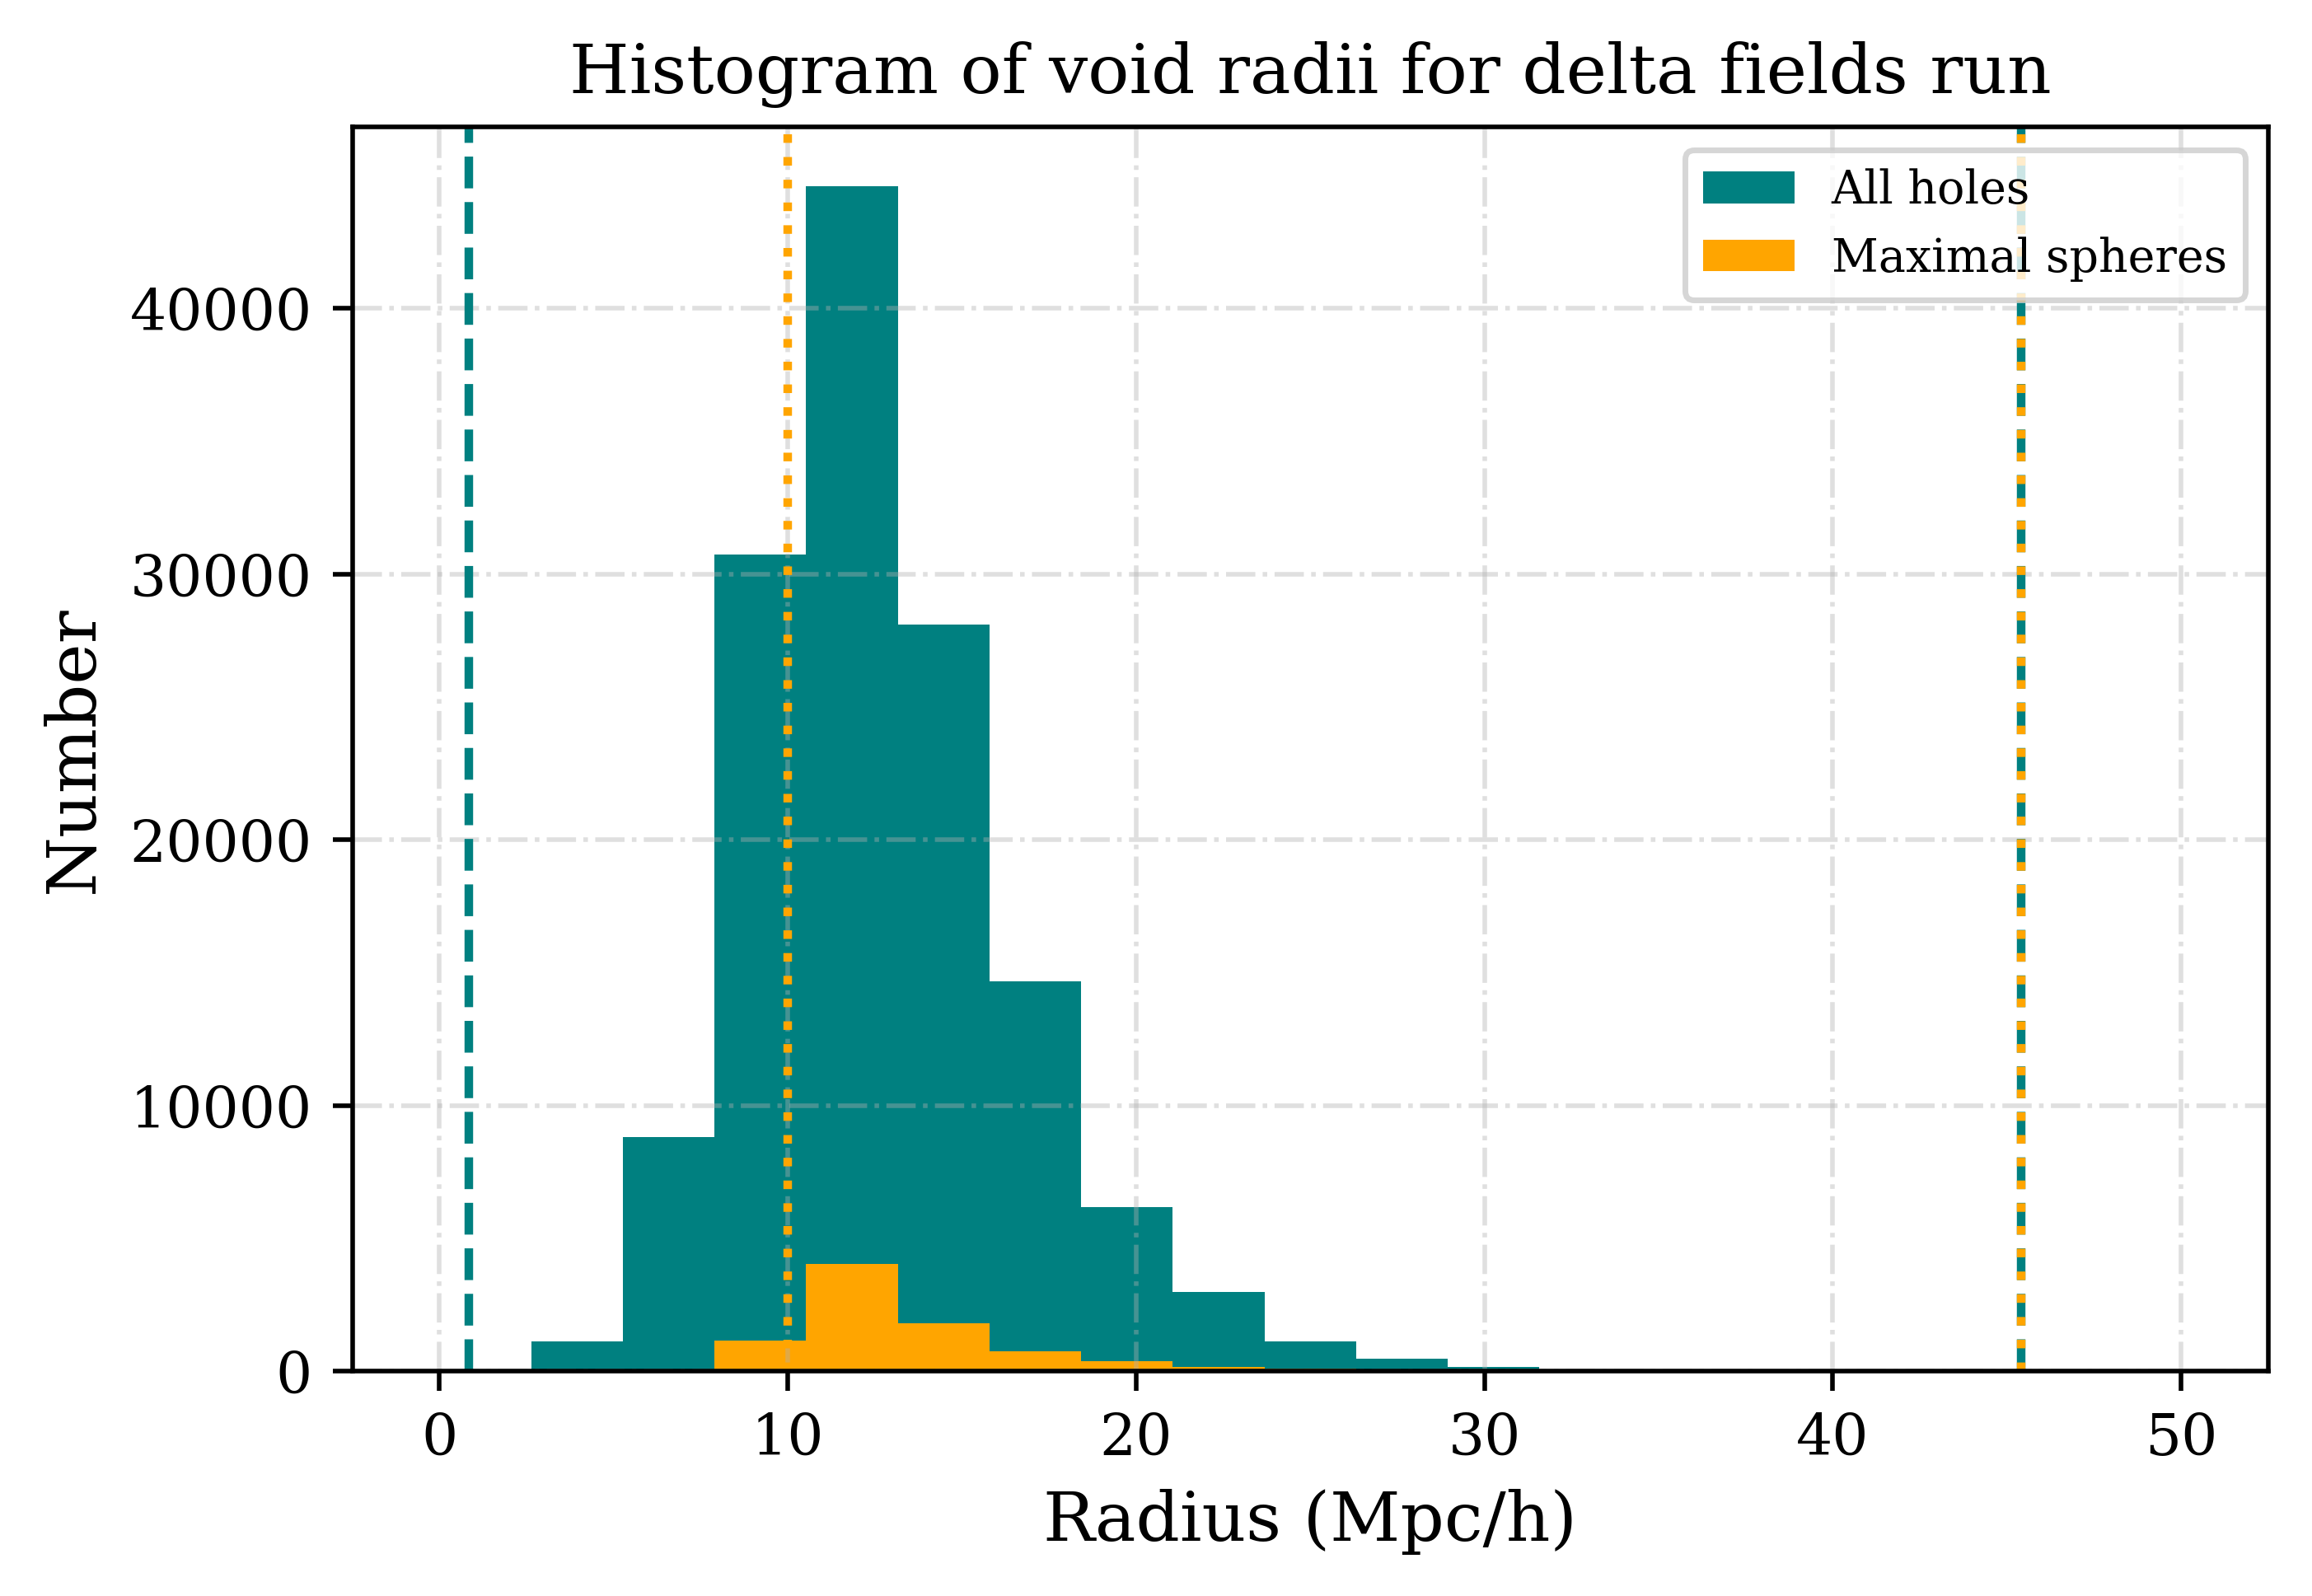

In [5]:
#Histogram of delta values
dpi=500
mpl.rcParams['figure.dpi']= dpi
plt.figure()                                                                                        
plt.rc('text', usetex=False)                                                                        
plt.rc('font', family='serif')                                                                      
                                                                                                    
plt.grid(True,ls='-.',alpha=.4)                                                                     
plt.title(r'Histogram of void radii for delta fields run',fontsize=12)                                         
plt.xlabel(r'Radius (Mpc/h)',fontsize=12)                                                                       
plt.ylabel(r'Number',fontsize=12)                                                                   
         
bins = np.linspace(0, 50, 20)

plt.hist(voids['radius'] , bins, color='teal', label='All holes')                                                                   
plt.hist(maxvoids['radius'] , bins, color='orange', label= 'Maximal spheres')      

plt.axvline(x=min(voids['radius']), color='teal', linestyle='dashed')
plt.axvline(x=max(voids['radius']), color='teal', linestyle='dashed')

plt.axvline(x=min(maxvoids['radius']), color='orange', linestyle='dotted')
plt.axvline(x=max(maxvoids['radius']), color='orange', linestyle='dotted')

plt.legend(loc='upper right', fontsize=8)
#plt.hist(2*np.pi*data[1].data['ra'], color='teal')                                                  
plt.show()                                                                                          
                                                                                                   
#plt.savefig('cz_distn.png')  
#max(quasars['comoving'])

In [6]:
min(voids['radius'])

0.8370602324576898

In [7]:
max(voids['radius'])

45.4095805765128

In [8]:
max(maxvoids['radius'])

45.4095805765128

In [9]:
min(maxvoids['radius'])

10.000315881662951

In [10]:
maxvoids[maxvoids['radius']<12]

x,y,z,radius,flag,r,ra,dec
float64,float64,float64,float64,int64,float64,float64,float64
1111.7059968310518,3722.0889591396813,30.836771646977592,11.999770411289798,4658,3884.686261414845,73.37027313222254,0.45482062283376323
1349.9221917716536,3698.584234560959,-4.481535934091473,11.998689312637014,4659,3937.237019553787,69.94875246909547,-0.0652165843535186
-537.4282481901132,4258.262557921401,-73.83888615909628,11.996024433688268,4660,4292.677639336224,97.1931738359291,-0.9856004925095971
-1784.8446776055148,4092.3163955462123,-31.593617383689278,11.99565139849383,4661,4464.719718088972,113.56419797279241,-0.4054444976110848
-2562.0886936030524,3355.9766372465874,-4.2372599399360675,11.994992475019922,4662,4222.190855232068,127.35958248305086,-0.057500278962889416
2576.9918650632726,3297.1721904094716,-3.1750176983198033,11.994937901429072,4663,4184.763028720893,51.989657331771106,-0.04347083220661929
2327.6848011018064,3457.2821465538455,-4.978725438042772,11.994812607167756,4664,4167.846105828202,56.04879514361069,-0.06844303161722529
-2588.6800584594553,3073.722013989535,75.97586410602864,11.99429530271392,4665,4019.3038944917053,130.1039892512286,1.0831118399842974
1612.0496709741246,3901.7778320711086,65.73538890533712,11.991485437409866,4666,4222.190845270242,67.55165477149177,0.8920753848084658
